# 1. Librerías

In [114]:
import src.preprocessing
import importlib
importlib.reload(src.preprocessing)

<module 'src.preprocessing' from '/Users/santiagocano/Library/Mobile Documents/com~apple~CloudDocs/Meli/Prueba/prueba-meli/src/preprocessing.py'>

In [1]:
import pandas as pd
from IPython.display import display_markdown
from src.mappings import *
from src.eda import *
from src.preprocessing import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 2. Lectura de datos

In [3]:
df = pd.read_csv('data/diabetic_data.csv')
df.head()

/var/folders/yv/6qc3rvd15552snnj273hstmr0000gn/T/ipykernel_25170/4055945242.py:1: DtypeWarning: Columns (3,4,7,10,17,22,27,28,29,30,31,33,37,41,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/diabetic_data.csv')


,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,admission_source_id,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,admission_type_id,insulin,repaglinide,nateglinide,discharge_disposition_id,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin
0,250.83,No,Caucasian,0,NaN,No,No,1,No,No,1,NaN,No,?,No,No,?,1,No,name,Female,No,2278392,No,No,No,No,41,1,1,0,8222157,No,0,No,NaN,?,6,No,No,No,25,[0-10),Pediatrics-Endocrinology,No,No,No,?,No,No,No,?,No,NO,0,No,No
1,276,No,Caucasian,0,NaN,No,No,9,No,No,3,NaN,No,250.01,No,No,?,1,No,name,Female,Ch,149190,No,No,No,No,59,18,7,0,55629189,No,0,No,NaN,?,1,Up,No,No,1,[10-20),?,No,No,No,?,Yes,No,No,255,No,>30,0,No,No
2,648,No,AfricanAmerican,1,NaN,No,No,6,No,No,2,NaN,No,250,No,No,?,1,No,name,Female,No,64410,Steady,No,No,No,11,13,7,0,86047875,No,5,No,NaN,?,1,No,No,No,1,[20-30),?,No,No,No,?,Yes,No,No,V27,No,NO,2,No,No
3,8,No,Caucasian,0,NaN,No,No,7,No,No,2,NaN,No,250.43,No,No,?,1,No,name,Male,Ch,500364,No,No,No,No,44,16,7,0,82442376,No,1,No,NaN,?,1,Up,No,No,1,[30-40),?,No,No,No,?,Yes,No,No,403,No,NO,0,No,No
4,197,No,Caucasian,0,NaN,No,No,5,No,No,1,NaN,No,157,No,No,?,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,7,0,42519267,No,0,No,NaN,?,1,Steady,No,No,1,[40-50),?,No,No,No,?,Yes,No,No,250,No,NO,0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223534 entries, 0 to 223533
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   diag_1                    223534 non-null  object
 1   glyburide                 223534 non-null  object
 2   race                      223534 non-null  object
 3   number_inpatient          223534 non-null  object
 4   out                       3 non-null       object
 5   acarbose                  223534 non-null  object
 6   glyburide-metformin_2     223534 non-null  object
 7   number_diagnoses          223534 non-null  object
 8   metformin-rosiglitazone   223534 non-null  object
 9   chlorpropamide            223534 non-null  object
 10  time_in_hospital          223534 non-null  object
 11  A1Cresult                 37315 non-null   object
 12  examide                   223534 non-null  object
 13  diag_2                    223534 non-null  object
 14  tola

In [5]:
ids_csv = 'data/IDS_mapping.csv'
mappings = load_mappings(ids_csv)
df = apply_mappings(df, mappings)
df.head()

,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,admission_source_id,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,admission_type_id,insulin,repaglinide,nateglinide,discharge_disposition_id,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,admission_type_desc,discharge_disposition_desc,admission_source_desc
0,250.83,No,Caucasian,0,NaN,No,No,1,No,No,1,NaN,No,?,No,No,?,1,No,name,Female,No,2278392,No,No,No,No,41,1,1.0,0,8222157,No,0,No,NaN,?,6.0,No,No,No,25.0,[0-10),Pediatrics-Endocrinology,No,No,No,?,No,No,No,?,No,NO,0,No,No,NULL,Not Mapped,Physician Referral
1,276,No,Caucasian,0,NaN,No,No,9,No,No,3,NaN,No,250.01,No,No,?,1,No,name,Female,Ch,149190,No,No,No,No,59,18,7.0,0,55629189,No,0,No,NaN,?,1.0,Up,No,No,1.0,[10-20),?,No,No,No,?,Yes,No,No,255,No,>30,0,No,No,Emergency,Discharged to home,Emergency Room
2,648,No,AfricanAmerican,1,NaN,No,No,6,No,No,2,NaN,No,250,No,No,?,1,No,name,Female,No,64410,Steady,No,No,No,11,13,7.0,0,86047875,No,5,No,NaN,?,1.0,No,No,No,1.0,[20-30),?,No,No,No,?,Yes,No,No,V27,No,NO,2,No,No,Emergency,Discharged to home,Emergency Room
3,8,No,Caucasian,0,NaN,No,No,7,No,No,2,NaN,No,250.43,No,No,?,1,No,name,Male,Ch,500364,No,No,No,No,44,16,7.0,0,82442376,No,1,No,NaN,?,1.0,Up,No,No,1.0,[30-40),?,No,No,No,?,Yes,No,No,403,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room
4,197,No,Caucasian,0,NaN,No,No,5,No,No,1,NaN,No,157,No,No,?,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,7.0,0,42519267,No,0,No,NaN,?,1.0,Steady,No,No,1.0,[40-50),?,No,No,No,?,Yes,No,No,250,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room


In [6]:
# Se eliminan columnas admission_type_id, discharge_disposition_id, admission_source_id porque ya no son necesarias
df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)
df.head()

,diag_1,glyburide,race,number_inpatient,out,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,payer_code_2,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,insulin,repaglinide,nateglinide,age,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,weight,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,admission_type_desc,discharge_disposition_desc,admission_source_desc
0,250.83,No,Caucasian,0,NaN,No,No,1,No,No,1,NaN,No,?,No,No,?,1,No,name,Female,No,2278392,No,No,No,No,41,1,0,8222157,No,0,No,NaN,?,No,No,No,[0-10),Pediatrics-Endocrinology,No,No,No,?,No,No,No,?,No,NO,0,No,No,NULL,Not Mapped,Physician Referral
1,276,No,Caucasian,0,NaN,No,No,9,No,No,3,NaN,No,250.01,No,No,?,1,No,name,Female,Ch,149190,No,No,No,No,59,18,0,55629189,No,0,No,NaN,?,Up,No,No,[10-20),?,No,No,No,?,Yes,No,No,255,No,>30,0,No,No,Emergency,Discharged to home,Emergency Room
2,648,No,AfricanAmerican,1,NaN,No,No,6,No,No,2,NaN,No,250,No,No,?,1,No,name,Female,No,64410,Steady,No,No,No,11,13,0,86047875,No,5,No,NaN,?,No,No,No,[20-30),?,No,No,No,?,Yes,No,No,V27,No,NO,2,No,No,Emergency,Discharged to home,Emergency Room
3,8,No,Caucasian,0,NaN,No,No,7,No,No,2,NaN,No,250.43,No,No,?,1,No,name,Male,Ch,500364,No,No,No,No,44,16,0,82442376,No,1,No,NaN,?,Up,No,No,[30-40),?,No,No,No,?,Yes,No,No,403,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room
4,197,No,Caucasian,0,NaN,No,No,5,No,No,1,NaN,No,157,No,No,?,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,0,42519267,No,0,No,NaN,?,Steady,No,No,[40-50),?,No,No,No,?,Yes,No,No,250,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room


# 3. Exploratorio

## Limpieza inicial

In [13]:
# Se elimina la columna payer_code_2 porque porque se repite con payer_code
df.drop(columns=['payer_code_2'], inplace=True)

In [54]:
# Revisar variable objetivo
df['readmitted'].value_counts()

readmitted
NO       120478
>30       78109
<30       24944
abcde         3
Name: count, dtype: int64

In [55]:
# Eliminar valores de readmitted que sean algo diferente a NO, <30 o >30
df = df[df['readmitted'].isin(['NO', '<30', '>30'])].reset_index(drop=True)
df['readmitted'].value_counts()

readmitted
NO     120478
>30     78109
<30     24944
Name: count, dtype: int64

In [18]:
# Contar valores faltantes y sentinelas
missing_counts = count_missing_and_sentinels(df)
missing_counts

out                           223534
weight                        216513
max_glu_serum                 211789
A1Cresult                     186222
medical_specialty             109715
payer_code                     88495
admission_source_desc          14922
admission_type_desc            11685
discharge_disposition_desc      8089
race                            5000
diag_3                          3138
diag_2                           807
diag_1                            49
examide                            3
pioglitazone                       3
nateglinide                        3
age                                3
metformin-rosiglitazone            3
troglitazone_2                     3
rosiglitazone                      3
glimepiride-pioglitazone           3
number_diagnoses                   3
diabetesMed                        3
troglitazone                       3
insulin                            3
glyburide-metformin_2              3
glyburide-metformin                3
r

In [19]:
# Porcentaje de valores faltantes y sentinelas
total_rows = len(df)
missing_df = missing_counts.rename_axis('column') \
    .reset_index() \
    .rename(columns={'missing_count':'count'})
missing_df['pct'] = missing_df['count'] / total_rows * 100
missing_df.sort_values('count', ascending=False).head(20)


,column,count,pct
0,out,223534,100.000000
1,weight,216513,96.859091
2,max_glu_serum,211789,94.745766
3,A1Cresult,186222,83.308132
4,medical_specialty,109715,49.082019
5,payer_code,88495,39.589056
6,admission_source_desc,14922,6.675495
7,admission_type_desc,11685,5.227393
8,discharge_disposition_desc,8089,3.618689
9,race,5000,2.236796


In [20]:
cols = [
   'max_glu_serum','A1Cresult',
    'medical_specialty',
    'payer_code',
    'admission_source_desc',
    'admission_type_desc',
    'discharge_disposition_desc',
    'race', 'diag_1', 'diag_2', 'diag_3'
]
reports = value_counts_report(df, cols, top_n=10, dropna=False)

for col, rpt in reports.items():
    display_markdown(f"**{col}**", raw=True)
    display(rpt)

**max_glu_serum**

,max_glu_serum,count,pct
0,NaN,211786,94.744424
1,Norm,5711,2.554869
2,>200,3250,1.453918
3,>300,2784,1.245448
4,abcde,3,0.001342


**A1Cresult**

,A1Cresult,count,pct
0,NaN,186219,83.306790
1,>8,17985,8.045756
2,Norm,10916,4.883373
3,>7,8411,3.762739
4,abcde,3,0.001342


**medical_specialty**

,medical_specialty,count,pct
0,?,109712,49.080677
1,InternalMedicine,32131,14.374100
2,Emergency/Trauma,16620,7.435111
3,Family/GeneralPractice,16377,7.326402
4,Cardiology,11755,5.258708
5,Surgery-General,6792,3.038464
6,Nephrology,3550,1.588125
7,Orthopedics,3079,1.377419
8,Orthopedics-Reconstructive,2724,1.218607
9,Radiologist,2486,1.112135


**payer_code**

,payer_code,count,pct
0,?,88492,39.587714
1,MC,71321,31.906108
2,HM,13721,6.138216
3,SP,10973,4.908873
4,BC,10232,4.577380
5,MD,7750,3.467034
6,CP,5541,2.478818
7,UN,5377,2.405451
8,CM,4247,1.899935
9,OG,2268,1.014611


**admission_source_desc**

,admission_source_desc,count,pct
0,Emergency Room,126303,56.502814
1,Physician Referral,64923,29.043904
2,NULL,14919,6.674152
3,Transfer from a hospital,6978,3.121673
4,Transfer from another health care facility,4966,2.221586
5,Clinic Referral,2428,1.086188
6,Transfer from a Skilled Nursing Facility (SNF),1889,0.845062
7,HMO Referral,415,0.185654
8,Not Mapped,349,0.156128
9,Not Available,267,0.119445


**admission_type_desc**

,admission_type_desc,count,pct
0,Emergency,118575,53.045622
1,Elective,41473,18.553330
2,Urgent,40539,18.135496
3,NULL,11682,5.226051
4,Not Available,10490,4.692798
5,Not Mapped,703,0.314494
6,Trauma Center,48,0.021473
7,Newborn,21,0.009395
8,NaN,3,0.001342


**discharge_disposition_desc**

,discharge_disposition_desc,count,pct
0,Discharged to home,132229,59.153865
1,Discharged/transferred to SNF,30746,13.754507
2,Discharged/transferred to home with home healt...,28337,12.676819
3,NULL,8086,3.617347
4,Discharged/transferred to another short term h...,4673,2.090510
5,Discharged/transferred to another rehab fac in...,4404,1.970170
6,Expired,3614,1.616756
7,Discharged/transferred to another type of inpa...,2590,1.158660
8,Not Mapped,2161,0.966743
9,Discharged/transferred to ICF,1784,0.798089


**race**

,race,count,pct
0,Caucasian,167172,74.785939
1,AfricanAmerican,42246,18.899138
2,?,4997,2.235454
3,Hispanic,4423,1.978670
4,Other,3291,1.472259
5,Asian,1402,0.627198
6,abcde,3,0.001342


**diag_1**

,diag_1,count,pct
0,428,15032,6.724704
1,414,14438,6.458973
2,786,8859,3.963155
3,410,7967,3.564111
4,486,7657,3.425430
5,427,6060,2.710997
6,491,4974,2.225165
7,715,4733,2.117351
8,682,4485,2.006406
9,780,4479,2.003722


**diag_2**

,diag_2,count,pct
0,276,14725,6.587365
1,428,14637,6.547997
2,250,13351,5.972693
3,427,11139,4.983135
4,401,8204,3.670135
5,496,7283,3.258117
6,599,7203,3.222329
7,403,6225,2.784811
8,414,5813,2.600499
9,411,5608,2.508791


**diag_3**

,diag_3,count,pct
0,250,25347,11.339215
1,401,18234,8.157148
2,276,11359,5.081554
3,428,10087,4.512513
4,427,8675,3.880841
5,414,8031,3.592742
6,496,5701,2.550395
7,403,5211,2.331189
8,585,4377,1.958091
9,272,4319,1.932145


In [56]:
# Eliminar columnas con missing mayor a 90%
df_clean = drop_columns(df, ['out', 'weight'])

# Sustituye sentinelas por NaN
df_clean = replace_sentinels_with_nan(df_clean)

# Imputaciones específicas semánticas
fill_map = {
    'max_glu_serum':               'not_measured',
    'A1Cresult':                   'not_measured',
    'medical_specialty':           'Unknown',
    'payer_code':                  'Unknown',
    'admission_source_desc':       'Not Mapped',
    'admission_type_desc':         'Not Mapped',
    'discharge_disposition_desc':  'Not Mapped',
    'race':                        'Unknown'
}

df_clean = impute_specific_categorical(df_clean, fill_map)

# Imputación genérica para el resto
df_clean = impute_missing(
    df_clean,
    numeric_strategy='median',
    categorical_strategy='constant',
    fill_value='Unknown'
)

# Verifica que ya no queden valores faltantes o sentinelas
count_missing_and_sentinels(df_clean)


Series([], Name: missing_count, dtype: object)

In [57]:
cols = [
   'max_glu_serum','A1Cresult',
    'medical_specialty',
    'payer_code',
    'admission_source_desc',
    'admission_type_desc',
    'discharge_disposition_desc',
    'race', 'diag_1', 'diag_2', 'diag_3'
]
reports = value_counts_report(df_clean, cols, top_n=10, dropna=False)

for col, rpt in reports.items():
    display_markdown(f"**{col}**", raw=True)
    display(rpt)

**max_glu_serum**

,max_glu_serum,count,pct
0,not_measured,211786,94.745695
1,Norm,5711,2.554903
2,>200,3250,1.453937
3,>300,2784,1.245465


**A1Cresult**

,A1Cresult,count,pct
0,not_measured,186219,83.307908
1,>8,17985,8.045864
2,Norm,10916,4.883439
3,>7,8411,3.762789


**medical_specialty**

,medical_specialty,count,pct
0,Unknown,109712,49.081335
1,InternalMedicine,32131,14.374293
2,Emergency/Trauma,16620,7.435210
3,Family/GeneralPractice,16377,7.326501
4,Cardiology,11755,5.258778
5,Surgery-General,6792,3.038505
6,Nephrology,3550,1.588147
7,Orthopedics,3079,1.377438
8,Orthopedics-Reconstructive,2724,1.218623
9,Radiologist,2486,1.112150


**payer_code**

,payer_code,count,pct
0,Unknown,88492,39.588245
1,MC,71321,31.906536
2,HM,13721,6.138298
3,SP,10973,4.908939
4,BC,10232,4.577441
5,MD,7750,3.467081
6,CP,5541,2.478851
7,UN,5377,2.405483
8,CM,4247,1.899960
9,OG,2268,1.014624


**admission_source_desc**

,admission_source_desc,count,pct
0,Emergency Room,126303,56.503572
1,Physician Referral,64923,29.044294
2,Not Mapped,15268,6.830373
3,Transfer from a hospital,6978,3.121715
4,Transfer from another health care facility,4966,2.221616
5,Clinic Referral,2428,1.086203
6,Transfer from a Skilled Nursing Facility (SNF),1889,0.845073
7,HMO Referral,415,0.185657
8,Not Available,267,0.119447
9,Court/Law Enforcement,35,0.015658


**admission_type_desc**

,admission_type_desc,count,pct
0,Emergency,118575,53.046334
1,Elective,41473,18.553579
2,Urgent,40539,18.135740
3,Not Mapped,12385,5.540619
4,Not Available,10490,4.692861
5,Trauma Center,48,0.021474
6,Newborn,21,0.009395


**discharge_disposition_desc**

,discharge_disposition_desc,count,pct
0,Discharged to home,132229,59.154659
1,Discharged/transferred to SNF,30746,13.754692
2,Discharged/transferred to home with home healt...,28337,12.676989
3,Not Mapped,10247,4.584152
4,Discharged/transferred to another short term h...,4673,2.090538
5,Discharged/transferred to another rehab fac in...,4404,1.970197
6,Expired,3614,1.616778
7,Discharged/transferred to another type of inpa...,2590,1.158676
8,Discharged/transferred to ICF,1784,0.798100
9,Left AMA,1368,0.611996


**race**

,race,count,pct
0,Caucasian,167172,74.786942
1,AfricanAmerican,42246,18.899392
2,Unknown,4997,2.235484
3,Hispanic,4423,1.978696
4,Other,3291,1.472279
5,Asian,1402,0.627206


**diag_1**

,diag_1,count,pct
0,428,15032,6.724794
1,414,14438,6.459059
2,786,8859,3.963209
3,410,7967,3.564159
4,486,7657,3.425476
5,427,6060,2.711033
6,491,4974,2.225195
7,715,4733,2.117380
8,682,4485,2.006433
9,780,4479,2.003749


**diag_2**

,diag_2,count,pct
0,276,14725,6.587453
1,428,14637,6.548085
2,250,13351,5.972773
3,427,11139,4.983201
4,401,8204,3.670184
5,496,7283,3.258161
6,599,7203,3.222372
7,403,6225,2.784849
8,414,5813,2.600534
9,411,5608,2.508824


**diag_3**

,diag_3,count,pct
0,250,25347,11.339367
1,401,18234,8.157258
2,276,11359,5.081622
3,428,10087,4.512573
4,427,8675,3.880893
5,414,8031,3.592790
6,496,5701,2.550429
7,403,5211,2.331220
8,585,4377,1.958118
9,272,4319,1.932170


## EDA

### Resumen general

In [59]:
numeric_cols = [
    'number_inpatient','number_diagnoses','time_in_hospital',
    'num_lab_procedures','num_procedures','num_medications',
    'number_outpatient','number_emergency'
]

# Convierte columnas a numéricas
df_clean[numeric_cols] = df_clean[numeric_cols]\
    .apply(lambda s: pd.to_numeric(s, errors='coerce'))

overview(df_clean)

■ Shape: (223531, 54)
■ Columnas y tipos:
 diag_1                        object
glyburide                     object
race                          object
number_inpatient               int64
acarbose                      object
glyburide-metformin_2         object
number_diagnoses               int64
metformin-rosiglitazone       object
chlorpropamide                object
time_in_hospital               int64
A1Cresult                     object
examide                       object
diag_2                        object
tolazamide                    object
citoglipton                   object
US                            object
miglitol                      object
name                          object
gender                        object
change                        object
encounter_id                  object
glipizide                     object
metformin-pioglitazone_2      object
glipizide-metformin           object
glimepiride                   object
num_lab_procedures             i

### Variables demográficas

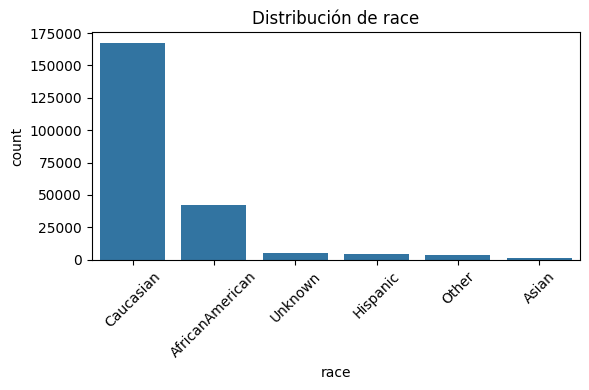

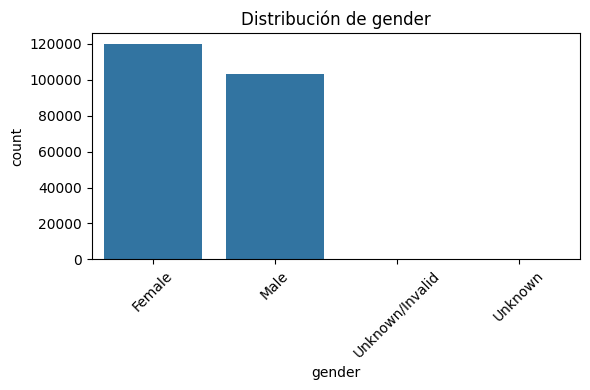

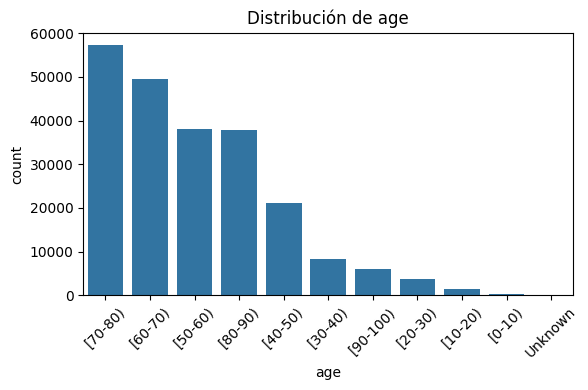

In [41]:
plot_categorical(df_clean, ['race','gender','age'])

Los pacientes en su mayoría son caucásicos, hay un poco mas de mujeres y la edad se acumula entre los 50 y 90 años

### Visitas, procedimientos y diagnósticos

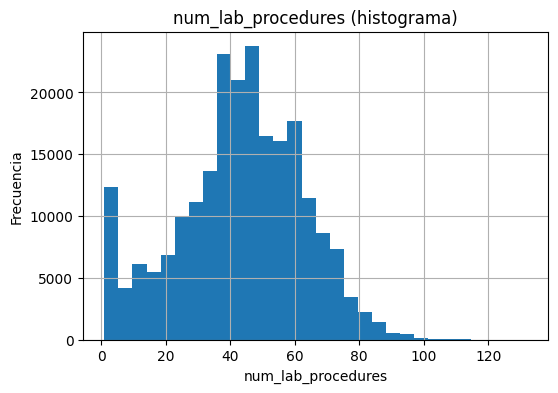

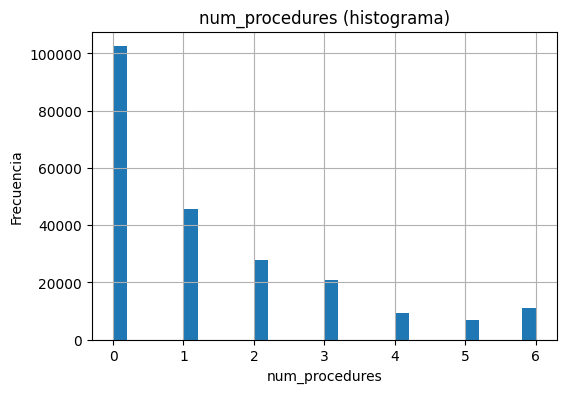

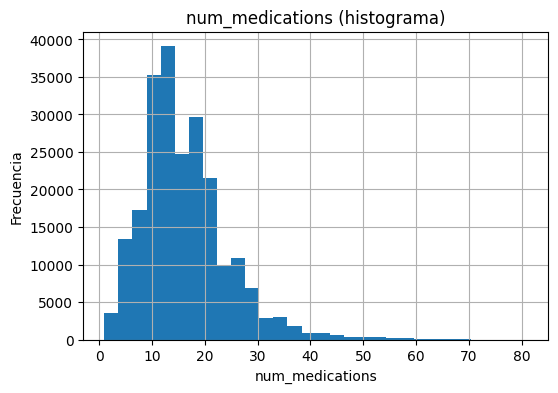

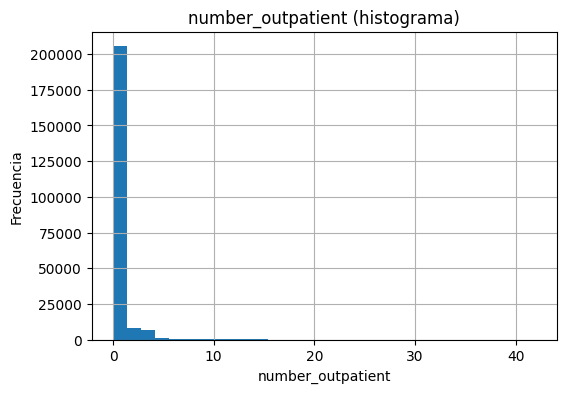

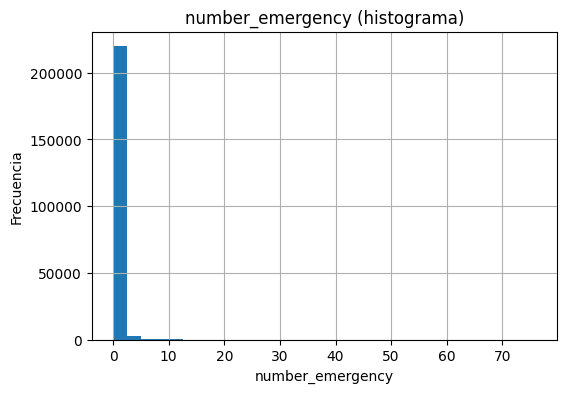

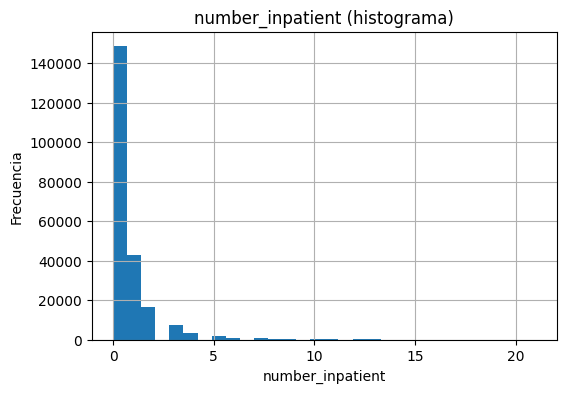

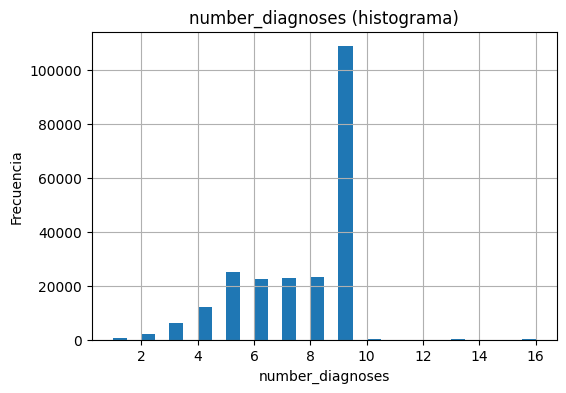

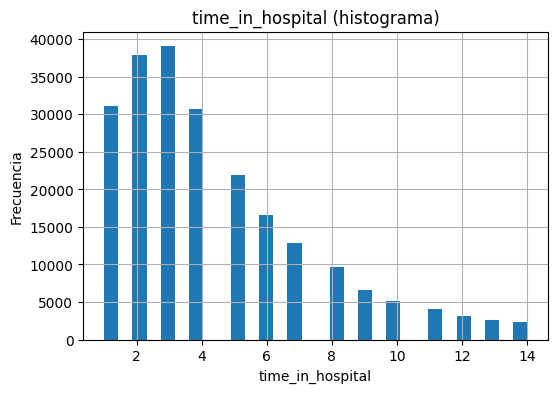

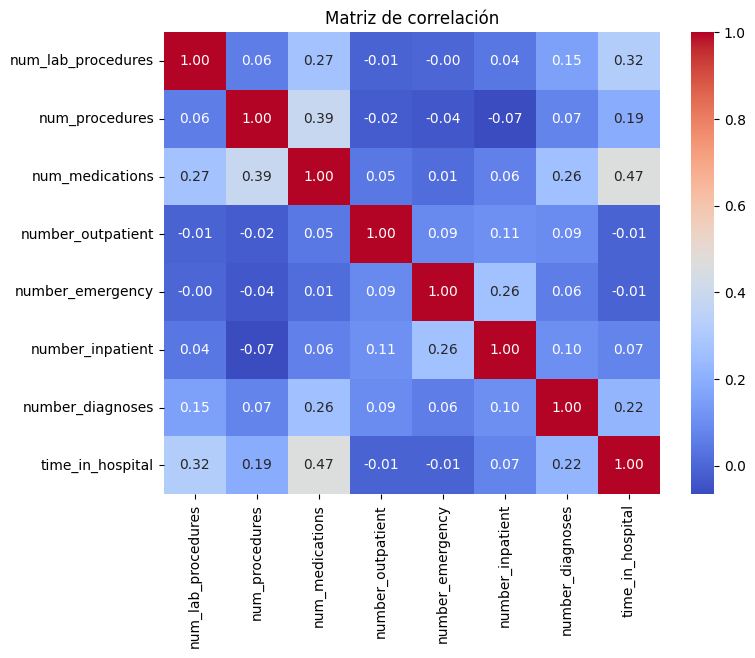

In [43]:
numeric_cols = [
    'num_lab_procedures','num_procedures','num_medications',
    'number_outpatient','number_emergency','number_inpatient',
    'number_diagnoses','time_in_hospital'
]

plot_numeric(df_clean, numeric_cols)
correlation_matrix(df_clean, numeric_cols)


El número de procedimientos de laboratorio se concentra entre 30 y 60; el número de procedimientos médicos en su mayoría es cero, sin embargo, si hay pacientes que presentan algunos procedimientos; el número de días en el hospital tiende a estar entre 1 y 5 días y no hay correlaciones importantes entre estas variables numéricas.

### Diagnósticos ICD-9

In [47]:
for col in ['diag_1','diag_2','diag_3']:
    display(top_categories(df_clean, col, top_n=10))

,count,pct
diag_1,,
428,15032,6.724704
414,14438,6.458973
786,8859,3.963155
410,7967,3.564111
486,7657,3.425430
427,6060,2.710997
491,4974,2.225165
715,4733,2.117351
682,4485,2.006406


,count,pct
diag_2,,
276,14725,6.587365
428,14637,6.547997
250,13351,5.972693
427,11139,4.983135
401,8204,3.670135
496,7283,3.258117
599,7203,3.222329
403,6225,2.784811
414,5813,2.600499


,count,pct
diag_3,,
250,25347,11.339215
401,18234,8.157148
276,11359,5.081554
428,10087,4.512513
427,8675,3.880841
414,8031,3.592742
496,5701,2.550395
403,5211,2.331189
585,4377,1.958091


### Resultados de laboratorio y A1C

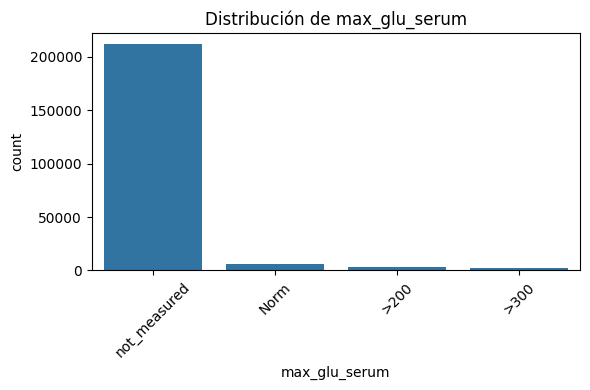

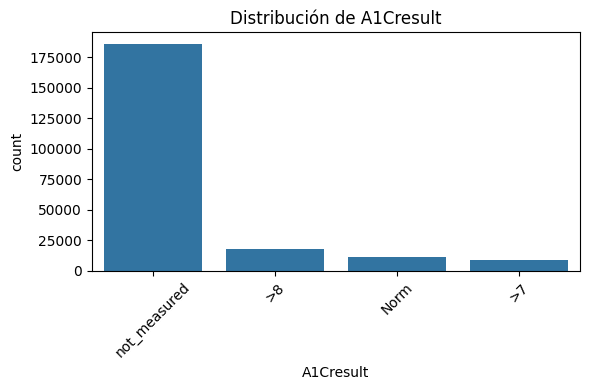

In [48]:
plot_categorical(df_clean, ['max_glu_serum','A1Cresult'])

### Admisión y alta

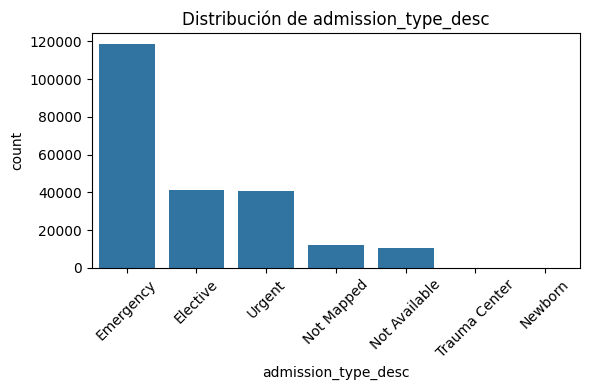

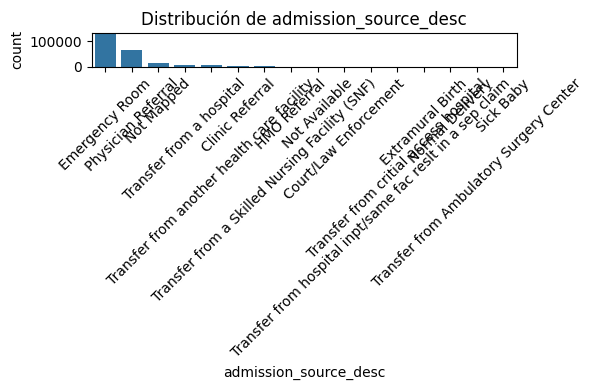

/Users/santiagocano/Library/Mobile Documents/com~apple~CloudDocs/Meli/Prueba/prueba-meli/src/eda.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


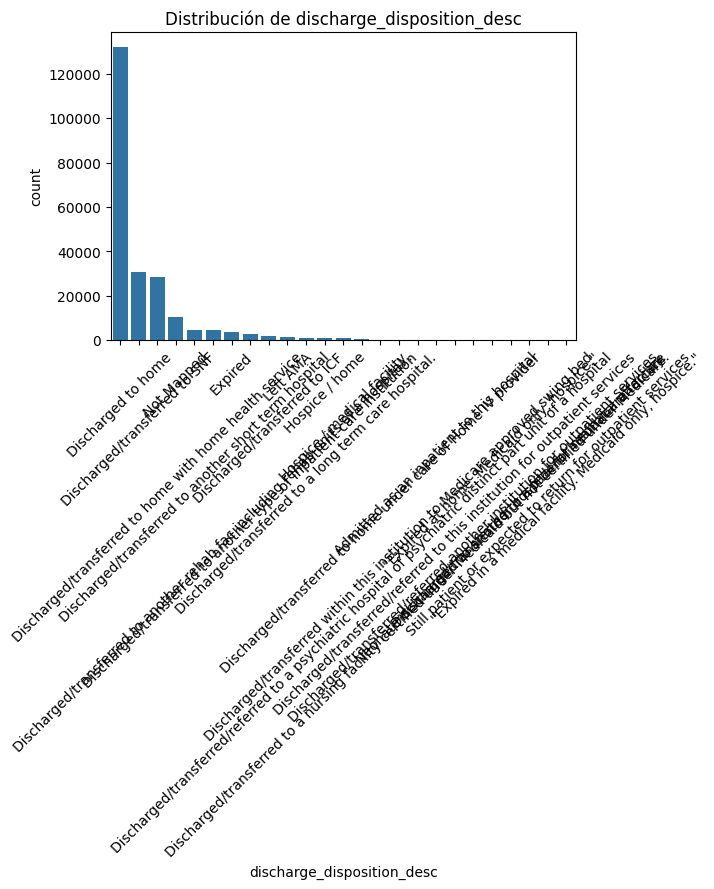

In [50]:
plot_categorical(df_clean, [
    'admission_type_desc',
    'admission_source_desc',
    'discharge_disposition_desc'
])

### Cambios y presencia de medicaciones

In [52]:
med_cols = ['metformin','insulin','glyburide','glipizide']
display(med_change_summary(df_clean, med_cols))

,metformin,insulin,glyburide,glipizide
Down,0.572172,12.008911,0.550699,0.545778
No,80.354219,46.547729,89.526426,87.488257
Steady,18.032156,30.340798,9.122550,11.207691
Unknown,0.001342,0.001342,0.001342,0.001342
Up,1.040110,11.101220,0.798984,0.756932


### Relación con la variable objetivo

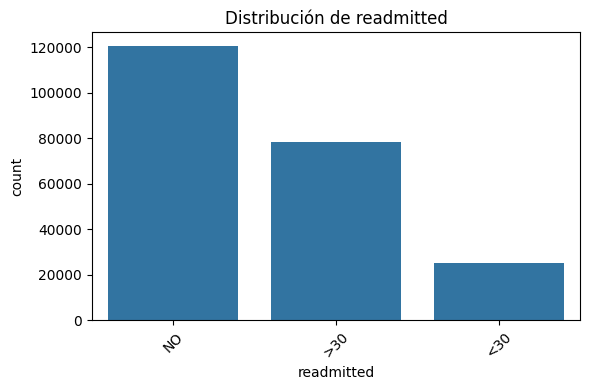

,number_inpatient,number_diagnoses,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency
readmitted,,,,,,,,
<30,1.222218,7.691549,4.768842,44.243546,1.277862,16.916172,0.438462,0.353873
>30,0.838341,7.647365,4.492799,43.857174,1.251904,16.291426,0.497651,0.284756
NO,0.382510,7.222788,4.250851,42.373761,1.409975,15.668504,0.273452,0.108667


In [60]:
# Distribución del target
plot_categorical(df_clean, ['readmitted'])

# Media de numeric_cols por readmitted
df_clean.groupby('readmitted')[numeric_cols].mean()


In [70]:
cat_cols = [
    'race', 'gender', 'age',
    'max_glu_serum', 'A1Cresult',
    'medical_specialty',
    'payer_code',
    'admission_type_desc',
    'admission_source_desc',
    'discharge_disposition_desc',
    'diag_1', 'diag_2', 'diag_3'
]

relations = cat_target_crosstab(df_clean, cat_cols, target='readmitted')

relations_sorted = {
    col: df_rel.sort_values('<30', ascending=False)
    for col, df_rel in relations.items()
}

In [71]:
display(relations_sorted['race'])
display(relations_sorted['gender'])
display(relations_sorted['age'])

readmitted,<30,>30,NO
race,,,
Caucasian,11.29,35.65,53.06
AfricanAmerican,11.19,34.63,54.18
Hispanic,10.38,31.45,58.17
Asian,10.34,25.11,64.55
Other,9.75,29.23,61.01
Unknown,8.16,23.63,68.20


readmitted,<30,>30,NO
gender,,,
Female,11.25,35.65,53.10
Male,11.05,34.12,54.82
Unknown/Invalid,0.00,0.00,100.00


readmitted,<30,>30,NO
age,,,
[20-30),14.11,31.20,54.69
[80-90),12.05,36.21,51.75
[70-80),11.77,36.33,51.90
[30-40),11.23,31.54,57.24
[60-70),11.20,35.10,53.70
[90-100),11.18,28.95,59.87
[40-50),10.62,33.85,55.53
[50-60),9.60,34.34,56.06
[10-20),5.85,32.59,61.56


Los pacientes entre 20-30 años tienen un mayor porcentaje de readmitidos en menos de 30 días en comparación con los otros rangos de edades. La variable de readmisiones, en el caso de menor a 30 días es el mas bajo, es decir, el dataset presenta un desbalance

In [72]:
display(relations_sorted['max_glu_serum'])
display(relations_sorted['A1Cresult'])

readmitted,<30,>30,NO
max_glu_serum,,,
>300,14.19,41.70,44.11
>200,12.55,35.42,52.03
Norm,11.19,34.23,54.58
not_measured,11.10,34.87,54.04


readmitted,<30,>30,NO
A1Cresult,,,
not_measured,11.43,35.09,53.48
>7,10.07,34.17,55.76
>8,9.82,35.40,54.77
Norm,9.57,32.21,58.22


Los pacientes con glucosa mayor a 300 tienen un mayor porcentaje de readmitidos en menos de 30 días

In [73]:
display(relations_sorted['medical_specialty'])
display(relations_sorted['admission_type_desc'])

readmitted,<30,>30,NO
medical_specialty,,,
Resident,60.00,40.00,0.00
AllergyandImmunology,41.18,47.06,11.76
Hematology,32.96,27.93,39.11
Pediatrics-Hematology-Oncology,25.00,0.00,75.00
InfectiousDiseases,23.75,32.50,43.75
...,...,...,...
Neurophysiology,0.00,0.00,100.00
Pediatrics-Neurology,0.00,42.86,57.14
Psychiatry-Addictive,0.00,0.00,100.00


readmitted,<30,>30,NO
admission_type_desc,,,
Emergency,11.54,35.76,52.69
Urgent,11.15,34.93,53.92
Not Mapped,10.84,41.17,47.99
Elective,10.40,30.52,59.07
Not Available,10.31,36.02,53.68
Newborn,9.52,19.05,71.43
Trauma Center,0.00,0.00,100.00


Los pacientes que ingresan por Resident o AllergyandImmunology tienen una mayor probabilidad de reingresar en menos de 30 días

In [74]:
display(relations_sorted['diag_1'])
display(relations_sorted['diag_2'])
display(relations_sorted['diag_3'])

readmitted,<30,>30,NO
diag_1,,,
906,100.0,0.00,0.00
V60,100.0,0.00,0.00
391,100.0,0.00,0.00
299,100.0,0.00,0.00
543,100.0,0.00,0.00
...,...,...,...
542,0.0,0.00,100.00
11,0.0,26.09,73.91
528,0.0,28.89,71.11


readmitted,<30,>30,NO
diag_2,,,
364,100.0,0.0,0.0
975,100.0,0.0,0.0
250.31,100.0,0.0,0.0
114,100.0,0.0,0.0
E945,100.0,0.0,0.0
...,...,...,...
623,0.0,20.0,80.0
622,0.0,50.0,50.0
621,0.0,0.0,100.0


readmitted,<30,>30,NO
diag_3,,,
744,100.0,0.00,0.00
750,100.0,0.00,0.00
E912,100.0,0.00,0.00
158,100.0,0.00,0.00
980,100.0,0.00,0.00
...,...,...,...
706,0.0,0.00,100.00
704,0.0,27.78,72.22
703,0.0,33.33,66.67


Hay algunos diagnósticos donde todos los pacientes reingresan en menos de 30 dias

# 4. Feature engineering

### Ingeniería de edad
- `age_num` a partir de `age`   

In [117]:
# Edad numérica
df_fe = create_age_numeric(df_clean, age_col='age')
df_fe.drop(columns=['age'], inplace=True)
df_fe.head()

,diag_1,glyburide,race,number_inpatient,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,insulin,repaglinide,nateglinide,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,admission_type_desc,discharge_disposition_desc,admission_source_desc,age_num
0,250.83,No,Caucasian,0,No,No,1,No,No,1,not_measured,No,Unknown,No,No,1,No,name,Female,No,2278392,No,No,No,No,41,1,0,8222157,No,0,No,not_measured,Unknown,No,No,No,Pediatrics-Endocrinology,No,No,No,No,No,No,Unknown,No,NO,0,No,No,Not Mapped,Not Mapped,Physician Referral,5.0
1,276,No,Caucasian,0,No,No,9,No,No,3,not_measured,No,250.01,No,No,1,No,name,Female,Ch,149190,No,No,No,No,59,18,0,55629189,No,0,No,not_measured,Unknown,Up,No,No,Unknown,No,No,No,Yes,No,No,255,No,>30,0,No,No,Emergency,Discharged to home,Emergency Room,15.0
2,648,No,AfricanAmerican,1,No,No,6,No,No,2,not_measured,No,250,No,No,1,No,name,Female,No,64410,Steady,No,No,No,11,13,0,86047875,No,5,No,not_measured,Unknown,No,No,No,Unknown,No,No,No,Yes,No,No,V27,No,NO,2,No,No,Emergency,Discharged to home,Emergency Room,25.0
3,8,No,Caucasian,0,No,No,7,No,No,2,not_measured,No,250.43,No,No,1,No,name,Male,Ch,500364,No,No,No,No,44,16,0,82442376,No,1,No,not_measured,Unknown,Up,No,No,Unknown,No,No,No,Yes,No,No,403,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room,35.0
4,197,No,Caucasian,0,No,No,5,No,No,1,not_measured,No,157,No,No,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,0,42519267,No,0,No,not_measured,Unknown,Steady,No,No,Unknown,No,No,No,Yes,No,No,250,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room,45.0


### Transformaciones ICD-9
- Truncado a 3 dígitos de `diag_1`, `diag_2`, `diag_3`  
- Agrupación de categorías raras (top 30)

In [118]:
icd_cols = ['diag_1', 'diag_2', 'diag_3']
df_fe = truncate_icd9(df_fe, cols=icd_cols)

for col in icd_cols:
    df_fe = group_rare_categories(df_fe, col=col, top_n=30)

df_fe.head()

,diag_1,glyburide,race,number_inpatient,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,insulin,repaglinide,nateglinide,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,admission_type_desc,discharge_disposition_desc,admission_source_desc,age_num
0,250,No,Caucasian,0,No,No,1,No,No,1,not_measured,No,Other,No,No,1,No,name,Female,No,2278392,No,No,No,No,41,1,0,8222157,No,0,No,not_measured,Unknown,No,No,No,Pediatrics-Endocrinology,No,No,No,No,No,No,Unk,No,NO,0,No,No,Not Mapped,Not Mapped,Physician Referral,5.0
1,276,No,Caucasian,0,No,No,9,No,No,3,not_measured,No,250,No,No,1,No,name,Female,Ch,149190,No,No,No,No,59,18,0,55629189,No,0,No,not_measured,Unknown,Up,No,No,Unknown,No,No,No,Yes,No,No,Other,No,>30,0,No,No,Emergency,Discharged to home,Emergency Room,15.0
2,Other,No,AfricanAmerican,1,No,No,6,No,No,2,not_measured,No,250,No,No,1,No,name,Female,No,64410,Steady,No,No,No,11,13,0,86047875,No,5,No,not_measured,Unknown,No,No,No,Unknown,No,No,No,Yes,No,No,Other,No,NO,2,No,No,Emergency,Discharged to home,Emergency Room,25.0
3,Other,No,Caucasian,0,No,No,7,No,No,2,not_measured,No,250,No,No,1,No,name,Male,Ch,500364,No,No,No,No,44,16,0,82442376,No,1,No,not_measured,Unknown,Up,No,No,Unknown,No,No,No,Yes,No,No,403,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room,35.0
4,Other,No,Caucasian,0,No,No,5,No,No,1,not_measured,No,Other,No,No,1,No,name,Male,Ch,16680,Steady,No,No,No,51,8,0,42519267,No,0,No,not_measured,Unknown,Steady,No,No,Unknown,No,No,No,Yes,No,No,250,No,NO,0,No,No,Emergency,Discharged to home,Emergency Room,45.0


### Encoding ordinal de variables con orden intrínseco

In [119]:
print(df_fe.change.value_counts())
print(df_fe.diabetesMed.value_counts())
print(df_fe.A1Cresult.value_counts())
print(df_fe.max_glu_serum.value_counts())

change
No    120284
Ch    103247
Name: count, dtype: int64
diabetesMed
Yes    172222
No      51309
Name: count, dtype: int64
A1Cresult
not_measured    186219
>8               17985
Norm             10916
>7                8411
Name: count, dtype: int64
max_glu_serum
not_measured    211786
Norm              5711
>200              3250
>300              2784
Name: count, dtype: int64


In [120]:
med_cols = [
    'glyburide',
    'acarbose',
    'glyburide-metformin_2',
    'metformin-rosiglitazone',
    'chlorpropamide',
    'examide',
    'tolazamide',
    'citoglipton',
    'miglitol',
    'glipizide',
    'metformin-pioglitazone_2',
    'glipizide-metformin',
    'glimepiride',
    'acetohexamide',
    'insulin',
    'repaglinide',
    'nateglinide',
    'troglitazone_2',
    'rosiglitazone',
    'glimepiride-pioglitazone',
    'pioglitazone',
    'troglitazone',
    'glyburide-metformin',
    'metformin-pioglitazone',
    'tolbutamide',
    'metformin'
]

# Crear un reporte simple de valores únicos
unique_vals = {col: sorted(df_clean[col].astype(str).unique()) for col in med_cols}

# Mostrar en pantalla de forma legible
for col, vals in unique_vals.items():
    print(f"{col}: {vals}")

glyburide: ['Down', 'No', 'Steady', 'Up']
acarbose: ['Down', 'No', 'Steady', 'Up']
glyburide-metformin_2: ['Down', 'No', 'Steady', 'Up']
metformin-rosiglitazone: ['No', 'Steady']
chlorpropamide: ['Down', 'No', 'Steady', 'Up']
examide: ['No']
tolazamide: ['No', 'Steady', 'Up']
citoglipton: ['No']
miglitol: ['Down', 'No', 'Steady', 'Up']
glipizide: ['Down', 'No', 'Steady', 'Up']
metformin-pioglitazone_2: ['No', 'Steady']
glipizide-metformin: ['No', 'Steady']
glimepiride: ['Down', 'No', 'Steady', 'Up']
acetohexamide: ['No', 'Steady']
insulin: ['Down', 'No', 'Steady', 'Up']
repaglinide: ['Down', 'No', 'Steady', 'Up']
nateglinide: ['Down', 'No', 'Steady', 'Up']
troglitazone_2: ['No', 'Steady']
rosiglitazone: ['Down', 'No', 'Steady', 'Up']
glimepiride-pioglitazone: ['No', 'Steady']
pioglitazone: ['Down', 'No', 'Steady', 'Up']
troglitazone: ['No', 'Steady']
glyburide-metformin: ['Down', 'No', 'Steady', 'Up']
metformin-pioglitazone: ['No', 'Steady']
tolbutamide: ['No', 'Steady']
metformin: ['D

In [121]:
ordering = {
    # pruebas de laboratorio
    'A1Cresult':    ['not_measured','Norm','>7','>8'],                
    'max_glu_serum':['not_measured','Norm','>200','>300'],           

    # indicadores generales
    'change':       ['No','Ch'],               
    'diabetesMed':  ['No','Yes'],                              

    # medicaciones (dosificación)
    **{col: ['No', 'Down', 'Steady', 'Up'] for col in med_cols}       
}

df_fe = ordinal_encode(
    df_fe,
    cols=list(ordering.keys()),
    ordering=ordering
)

In [122]:
df_fe.head()

,diag_1,glyburide,race,number_inpatient,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,diag_2,tolazamide,citoglipton,US,miglitol,name,gender,change,encounter_id,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,patient_nbr,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,payer_code,insulin,repaglinide,nateglinide,medical_specialty,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,diabetesMed,pioglitazone,troglitazone,diag_3,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,admission_type_desc,discharge_disposition_desc,admission_source_desc,age_num
0,250,0.0,Caucasian,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,Other,0.0,0.0,1,0.0,name,Female,0.0,2278392,0.0,0.0,0.0,0.0,41,1,0,8222157,0.0,0,0.0,0.0,Unknown,0.0,0.0,0.0,Pediatrics-Endocrinology,0.0,0.0,0.0,0.0,0.0,0.0,Unk,0.0,NO,0,0.0,0.0,Not Mapped,Not Mapped,Physician Referral,5.0
1,276,0.0,Caucasian,0,0.0,0.0,9,0.0,0.0,3,0.0,0.0,250,0.0,0.0,1,0.0,name,Female,1.0,149190,0.0,0.0,0.0,0.0,59,18,0,55629189,0.0,0,0.0,0.0,Unknown,3.0,0.0,0.0,Unknown,0.0,0.0,0.0,1.0,0.0,0.0,Other,0.0,>30,0,0.0,0.0,Emergency,Discharged to home,Emergency Room,15.0
2,Other,0.0,AfricanAmerican,1,0.0,0.0,6,0.0,0.0,2,0.0,0.0,250,0.0,0.0,1,0.0,name,Female,0.0,64410,2.0,0.0,0.0,0.0,11,13,0,86047875,0.0,5,0.0,0.0,Unknown,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,1.0,0.0,0.0,Other,0.0,NO,2,0.0,0.0,Emergency,Discharged to home,Emergency Room,25.0
3,Other,0.0,Caucasian,0,0.0,0.0,7,0.0,0.0,2,0.0,0.0,250,0.0,0.0,1,0.0,name,Male,1.0,500364,0.0,0.0,0.0,0.0,44,16,0,82442376,0.0,1,0.0,0.0,Unknown,3.0,0.0,0.0,Unknown,0.0,0.0,0.0,1.0,0.0,0.0,403,0.0,NO,0,0.0,0.0,Emergency,Discharged to home,Emergency Room,35.0
4,Other,0.0,Caucasian,0,0.0,0.0,5,0.0,0.0,1,0.0,0.0,Other,0.0,0.0,1,0.0,name,Male,1.0,16680,2.0,0.0,0.0,0.0,51,8,0,42519267,0.0,0,0.0,0.0,Unknown,2.0,0.0,0.0,Unknown,0.0,0.0,0.0,1.0,0.0,0.0,250,0.0,NO,0,0.0,0.0,Emergency,Discharged to home,Emergency Room,45.0


## Eliminar variables irrelevantes para el análisis

In [123]:
df_fe.drop(columns=['encounter_id', 'patient_nbr', 'name'], inplace=True)

## One-hot encoding del resto de categóricas

In [125]:
# Excluir ordinales, numéricas, target
exclude = set(ord_cols + ['readmitted'] + df_fe.select_dtypes(include='number').columns.tolist())
cat_cols = [c for c in df_fe.select_dtypes(include=['object','category']).columns if c not in exclude]

df_fe[cat_cols] = df_fe[cat_cols].astype(str)
df_fe = one_hot_encode(df_fe, cols=cat_cols)
df_fe.head()

,glyburide,number_inpatient,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,tolazamide,citoglipton,miglitol,change,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,insulin,repaglinide,nateglinide,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,diabetesMed,pioglitazone,troglitazone,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,age_num,diag_1_250,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,diag_2_250,diag_2_276,diag_2_280,diag_2_285,diag_2_305,diag_2_401,diag_2_403,diag_2_410,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_511,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_785,diag_2_786,diag_2_998,diag_2_Other,US_1,gender_Female,gender_Male,gender_Unknown/Invalid,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_Unknown,payer_code_WC,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_

## Escalado de numéricos

In [127]:
num_cols = df_fe.select_dtypes(include='number').columns.tolist()
df_fe = scale_numeric(df_fe, cols=num_cols)
df_fe.head()

,glyburide,number_inpatient,acarbose,glyburide-metformin_2,number_diagnoses,metformin-rosiglitazone,chlorpropamide,time_in_hospital,A1Cresult,examide,tolazamide,citoglipton,miglitol,change,glipizide,metformin-pioglitazone_2,glipizide-metformin,glimepiride,num_lab_procedures,num_medications,number_emergency,metformin-pioglitazone,num_procedures,acetohexamide,max_glu_serum,insulin,repaglinide,nateglinide,troglitazone_2,rosiglitazone,glimepiride-pioglitazone,diabetesMed,pioglitazone,troglitazone,glyburide-metformin,readmitted,number_outpatient,tolbutamide,metformin,age_num,diag_1_250,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,diag_2_250,diag_2_276,diag_2_280,diag_2_285,diag_2_305,diag_2_401,diag_2_403,diag_2_410,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_511,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_785,diag_2_786,diag_2_998,diag_2_Other,US_1,gender_Female,gender_Male,gender_Unknown/Invalid,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_Unknown,payer_code_WC,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_

## Ingeniería de la variable respuesta
Creamos `y` como binaria:  
- **1** si `readmitted == '<30'`  
- **0** en cualquier otro caso  

In [128]:
df_fe['y'] = (df_fe['readmitted'] == '<30').astype(int)
df_fe = df_fe.drop(columns=['readmitted'])

# Verificamos la proporción de clases
print(df_fe['y'].value_counts())
print(df_fe['y'].value_counts(normalize=True))

y
0    198587
1     24944
Name: count, dtype: int64
y
0    0.888409
1    0.111591
Name: proportion, dtype: float64


/var/folders/yv/6qc3rvd15552snnj273hstmr0000gn/T/ipykernel_25170/3920895981.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fe['y'] = (df_fe['readmitted'] == '<30').astype(int)


In [129]:
df_fe.to_csv('data/diabetic_data_preprocessed.csv', index=False)

In [131]:
df_clean = []
df = []

# 5. Selección de features
Se usará la librería de Boruta con randomforest para identificar las variables mas relevantes

In [132]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Preparar X e y
X = df_fe.drop('y', axis=1).values
y = df_fe['y'].values
feature_names = df_fe.drop('y', axis=1).columns

In [134]:
# Definir el modelo base
rf = RandomForestClassifier(
    n_jobs=-1,
    class_weight='balanced',
    max_depth=5,
    random_state=42
)

In [135]:
# Inicializar Boruta
boruta_selector = BorutaPy(
    rf,
    n_estimators='auto',
    verbose=2,
    random_state=42
)

In [136]:
# Ajustar Boruta
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	281
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	40
Tentative: 	23
Rejected: 	218
Iteration: 	9 / 100
Confirmed: 	40
Tentative: 	23
Rejected: 	218
Iteration: 	10 / 100
Confirmed: 	40
Tentative: 	23
Rejected: 	218
Iteration: 	11 / 100
Confirmed: 	40
Tentative: 	23
Rejected: 	218
Iteration: 	12 / 100
Confirmed: 	41
Tentative: 	18
Rejected: 	222
Iteration: 	13 / 100
Confirmed: 	41
Tentative: 	18
Rejected: 	222
Iteration: 	14 / 100
Confirmed: 	41
Tentative: 	18
Rejected: 	222
Iteration: 	15 / 100
Confirmed: 	41
Tentative: 	18
Rejected: 	222
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=193, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x33C824540),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x33C824540,
         verbose=2)

In [137]:
# Crear DataFrame con ranking y selección
ranking_df = pd.DataFrame({
    'feature': feature_names,
    'ranking': boruta_selector.ranking_,
    'selected': boruta_selector.support_
}).sort_values(['selected', 'ranking'], ascending=[False, True])

# Mostrar top 30
display(ranking_df.head(30))

,feature,ranking,selected
1,number_inpatient,1,True
4,number_diagnoses,1,True
7,time_in_hospital,1,True
8,A1Cresult,1,True
13,change,1,True
18,num_lab_procedures,1,True
19,num_medications,1,True
20,number_emergency,1,True
22,num_procedures,1,True
25,insulin,1,True


In [138]:
# Lista de features seleccionadas
selected_features = feature_names[boruta_selector.support_].tolist()
print("Features seleccionadas:", selected_features)

Features seleccionadas: ['number_inpatient', 'number_diagnoses', 'time_in_hospital', 'A1Cresult', 'change', 'num_lab_procedures', 'num_medications', 'number_emergency', 'num_procedures', 'insulin', 'diabetesMed', 'number_outpatient', 'metformin', 'age_num', 'diag_1_250', 'diag_1_414', 'diag_1_428', 'diag_1_434', 'diag_1_786', 'diag_2_401', 'diag_2_403', 'diag_2_414', 'payer_code_MC', 'payer_code_Unknown', 'medical_specialty_Cardiology', 'medical_specialty_ObstetricsandGynecology', 'medical_specialty_Unknown', 'diag_3_272', 'diag_3_401', 'diag_3_403', 'diag_3_585', 'diag_3_Unk', 'discharge_disposition_desc_Discharged to home', 'discharge_disposition_desc_Discharged/transferred to SNF', 'discharge_disposition_desc_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'discharge_disposition_desc_Discharged/transferred to another short term hospital', 'discharge_disposition_desc_Discharged/transferred to another type of inpatient care institution', 'discharge_

In [139]:
df_fe = df_fe[selected_features + ['y']]
df_fe.head()

,number_inpatient,number_diagnoses,time_in_hospital,A1Cresult,change,num_lab_procedures,num_medications,number_emergency,num_procedures,insulin,diabetesMed,number_outpatient,metformin,age_num,diag_1_250,diag_1_414,diag_1_428,diag_1_434,diag_1_786,diag_2_401,diag_2_403,diag_2_414,payer_code_MC,payer_code_Unknown,medical_specialty_Cardiology,medical_specialty_ObstetricsandGynecology,medical_specialty_Unknown,diag_3_272,diag_3_401,diag_3_403,diag_3_585,diag_3_Unk,discharge_disposition_desc_Discharged to home,discharge_disposition_desc_Discharged/transferred to SNF,discharge_disposition_desc_Discharged/transferred to another rehab fac including rehab units of a hospital .,discharge_disposition_desc_Discharged/transferred to another short term hospital,discharge_disposition_desc_Discharged/transferred to another type of inpatient care institution,discharge_disposition_desc_Discharged/transferred to home with home health service,discharge_disposition_desc_Discharged/transferred within this institution to Medicare approved swing bed,discharge_disposition_desc_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,discharge_disposition_desc_Expired,admission_source_desc_Emergency Room,y
0,-0.503982,-3.322677,-1.138414,-0.411205,-0.926477,-0.106873,-1.848869,-0.21216,-0.785451,-0.963853,-1.832093,-0.291123,-0.488431,-3.826326,3.258811,-0.262775,-0.268507,-0.142619,-0.203144,-0.195193,-0.169252,-0.1634,-0.684522,1.235315,-0.235599,-0.081668,-0.981792,-0.140365,-0.298023,-0.154495,-0.141323,8.384614,-1.203437,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,-1.139754,0
1,-0.503982,0.815502,-0.467416,-0.411205,1.079357,0.808848,0.242973,-0.21216,-0.785451,1.764146,0.545824,-0.291123,-0.488431,-3.198826,-0.306860,-0.262775,-0.268507,-0.142619,-0.203144,-0.195193,-0.169252,-0.1634,-0.684522,1.235315,-0.235599,-0.081668,1.018545,-0.140365,-0.298023,-0.154495,-0.141323,-0.119266,0.830954,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
2,0.289071,-0.736315,-0.802915,-0.411205,-0.926477,-1.633076,-0.372274,-0.21216,2.145342,-0.963853,0.545824,1.281631,-0.488431,-2.571326,-0.306860,-0.262775,-0.268507,-0.142619,-0.203144,-0.195193,-0.169252,-0.1634,-0.684522,1.235315,-0.235599,-0.081668,1.018545,-0.140365,-0.298023,-0.154495,-0.141323,-0.119266,0.830954,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
3,-0.503982,-0.219043,-0.802915,-0.411205,1.079357,0.045747,-0.003126,-0.21216,-0.199293,1.764146,0.545824,-0.291123,-0.488431,-1.943826,-0.306860,-0.262775,-0.268507,-0.142619,-0.203144,-0.195193,-0.169252,-0.1634,-0.684522,1.235315,-0.235599,-0.081668,1.018545,-0.140365,-0.298023,6.472711,-0.141323,-0.119266,0.830954,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
4,-0.503982,-1.253588,-1.138414,-0.411205,1.079357,0.401861,-0.987522,-0.21216,-0.785451,0.854813,0.545824,-0.291123,-0.488431,-1.316326,-0.306860,-0.262775,-0.268507,-0.142619,-0.203144,-0.195193,-0.169252,-0.1634,-0.684522,1.235315,-0.235599,-0.081668,1.018545,-0.140365,-0.298023,-0.154495,-0.141323,-0.119266,0.830954,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0


In [141]:
df_fe.to_csv('data/diabetic_data_features_selected.csv', index=False)

# 6. Experimentos con modelos
Se usará pycaret para probar diferentes modelos de clasificación al tiempo.

In [2]:
df_fe = pd.read_csv('data/diabetic_data_features_selected.csv')

In [5]:
df_fe.head()

,number_inpatient,number_diagnoses,time_in_hospital,A1Cresult,change,num_lab_procedures,num_medications,number_emergency,num_procedures,insulin,...,discharge_disposition_desc_Discharged/transferred to SNF,discharge_disposition_desc_Discharged/transferred to another rehab fac including rehab units of a hospital .,discharge_disposition_desc_Discharged/transferred to another short term hospital,discharge_disposition_desc_Discharged/transferred to another type of inpatient care institution,discharge_disposition_desc_Discharged/transferred to home with home health service,discharge_disposition_desc_Discharged/transferred within this institution to Medicare approved swing bed,discharge_disposition_desc_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,discharge_disposition_desc_Expired,admission_source_desc_Emergency Room,y
0,-0.503982,-3.322677,-1.138414,-0.411205,-0.926477,-0.106873,-1.848869,-0.21216,-0.785451,-0.963853,...,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,-1.139754,0
1,-0.503982,0.815502,-0.467416,-0.411205,1.079357,0.808848,0.242973,-0.21216,-0.785451,1.764146,...,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
2,0.289071,-0.736315,-0.802915,-0.411205,-0.926477,-1.633076,-0.372274,-0.21216,2.145342,-0.963853,...,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
3,-0.503982,-0.219043,-0.802915,-0.411205,1.079357,0.045747,-0.003126,-0.21216,-0.199293,1.764146,...,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0
4,-0.503982,-1.253588,-1.138414,-0.411205,1.079357,0.401861,-0.987522,-0.21216,-0.785451,0.854813,...,-0.399354,-0.141767,-0.146122,-0.108271,-0.381016,-0.025301,-0.03672,-0.128193,0.877382,0


In [3]:
from pycaret.classification import (
    setup, compare_models, evaluate_model,
    tune_model, finalize_model, save_model, pull
)

In [4]:
clf = setup(
    data=df_fe,
    target='y',
    session_id=42,
    fold=5,                     # número de folds CV
    verbose=False
)

In [5]:
# Comparar todos los modelos disponibles para clasificación
best = compare_models(sort='AUC')  # ordena por AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9572,0.9468,0.6320,0.9764,0.7673,0.7450,0.7664,3.2040
rf,Random Forest Classifier,0.9579,0.9266,0.6293,0.9903,0.7696,0.7477,0.7710,2.7720
dt,Decision Tree Classifier,0.9237,0.8229,0.6930,0.6477,0.6696,0.6265,0.6270,0.2820
knn,K Neighbors Classifier,0.8802,0.7618,0.1587,0.4062,0.2282,0.1766,0.1997,7.3900
lightgbm,Light Gradient Boosting Machine,0.8897,0.7068,0.0211,0.6879,0.0409,0.0345,0.1071,0.8640
gbc,Gradient Boosting Classifier,0.8888,0.6800,0.0120,0.5808,0.0235,0.0191,0.0714,2.9320
ridge,Ridge Classifier,0.8886,0.6730,0.0085,0.5412,0.0167,0.0133,0.0569,0.1140
lda,Linear Discriminant Analysis,0.8854,0.6730,0.0511,0.3971,0.0905,0.0668,0.1094,0.1580
ada,Ada Boost Classifier,0.8880,0.6724,0.0149,0.4531,0.0288,0.0218,0.0655,0.9780
lr,Logistic Regression,0.8882,0.6722,0.0189,0.4758,0.0363,0.0280,0.0771,0.7100


In [6]:
# Ver los resultados de todos los modelos evaluados
results = pull()
display(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9572,0.9468,0.6320,0.9764,0.7673,0.7450,0.7664,3.204
rf,Random Forest Classifier,0.9579,0.9266,0.6293,0.9903,0.7696,0.7477,0.7710,2.772
dt,Decision Tree Classifier,0.9237,0.8229,0.6930,0.6477,0.6696,0.6265,0.6270,0.282
knn,K Neighbors Classifier,0.8802,0.7618,0.1587,0.4062,0.2282,0.1766,0.1997,7.390
lightgbm,Light Gradient Boosting Machine,0.8897,0.7068,0.0211,0.6879,0.0409,0.0345,0.1071,0.864
gbc,Gradient Boosting Classifier,0.8888,0.6800,0.0120,0.5808,0.0235,0.0191,0.0714,2.932
ridge,Ridge Classifier,0.8886,0.6730,0.0085,0.5412,0.0167,0.0133,0.0569,0.114
lda,Linear Discriminant Analysis,0.8854,0.6730,0.0511,0.3971,0.0905,0.0668,0.1094,0.158
ada,Ada Boost Classifier,0.8880,0.6724,0.0149,0.4531,0.0288,0.0218,0.0655,0.978
lr,Logistic Regression,0.8882,0.6722,0.0189,0.4758,0.0363,0.0280,0.0771,0.710


El modelo Extra Trees Classifier es el más adecuado porque combina la mejor capacidad de captura de casos <30 (Recall más alto) con la mayor capacidad discriminativa general (AUC más alto), manteniendo un nivel de precisión y F1 muy competitivo.

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 7. Entrenamiento de modelo final (Extra Trees)

In [8]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer, classification_report

In [10]:
# Prepara X e y
X = df_fe.drop('y', axis=1).values
y = df_fe['y'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Optimización de parámetros con optuna

In [11]:
# Define la función objetivo para Optuna
def objective(trial):
    params = {
        'n_estimators':       trial.suggest_int('n_estimators', 100, 1000),
        'max_depth':          trial.suggest_int('max_depth', 3, 20),
        'min_samples_split':  trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':   trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features':       trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap':          trial.suggest_categorical('bootstrap', [False, True]),
        'class_weight':       'balanced',
        'random_state':       42,
        'n_jobs':             -1
    }
    model = ExtraTreesClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Recall como métrica (importante detectar la clase positiva)
    score = cross_val_score(
        model, X_train, y_train,
        scoring=make_scorer(recall_score),
        cv=cv,
        n_jobs=-1
    )
    return score.mean()


In [12]:
# Ejecuta la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Mejores parámetros:", study.best_params)
print("Mejor Recall (CV):", study.best_value)

[I 2025-08-06 09:32:34,191] A new study created in memory with name: no-name-d09c1b66-44ae-497d-a295-9090e9857421
[I 2025-08-06 09:36:46,580] Trial 0 finished with value: 0.5769982460536206 and parameters: {'n_estimators': 611, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5769982460536206.
[I 2025-08-06 09:39:59,721] Trial 1 finished with value: 0.7067401653720873 and parameters: {'n_estimators': 404, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.7067401653720873.
[I 2025-08-06 09:41:31,986] Trial 2 finished with value: 0.6047607116011025 and parameters: {'n_estimators': 778, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.7067401653720873.
[I 2025-08-06 09:44:20,352] Trial 3 finished with value: 0.6428965171636181 and

KeyboardInterrupt: 

## Entrenamiento del modelo con mejores parámetros

In [17]:
# Entrena el modelo final con los mejores hiperparámetros
best_params = {'n_estimators': 404, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False}
et_model = ExtraTreesClassifier(**best_params, random_state=42, n_jobs=-1, class_weight='balanced')
et_model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=5, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=7,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=404, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [18]:
# Evalúa en el conjunto de test
y_pred = et_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66     39718
           1       0.15      0.70      0.25      4989

    accuracy                           0.53     44707
   macro avg       0.54      0.61      0.45     44707
weighted avg       0.84      0.53      0.61     44707



## Guarda el modelo final

In [ ]:
import joblib

model_path = 'artifacts/et_model.joblib'

# Guardar el modelo entrenado
joblib.dump(et_model, model_path)

['artifacts/et_model.joblib']